In [1]:
import numpy as np
import pandas as pd
from scipy.stats import expon

# Set a seed for reproducibility
np.random.seed(42)

# Parameters
n = 1000  # Number of individuals
rate = 0.003  # Event rate (for exponential distribution)

# Generate survival times from exponential distribution
survival_times = expon(scale=1/rate).rvs(n)

# Generate random censoring times
censoring_times = np.random.uniform(0, 5*365, size=n)



# Observed time is the minimum of survival time and censoring time
observed_times = np.minimum(survival_times, censoring_times)

# Create an event indicator (1 if event observed, 0 if censored)
events = (survival_times <= censoring_times).astype(int)

#Create random columns containing 4
variables = {}
random_array = ['A', 'B', 'C', 'D']
for i in range(10):
    
    variables[f'var{i}'] = np.random.choice(random_array, 1000)



random_array = ['A', 'B', 'C', 'D']
for i in range(10):
    
    variables[f'var_num{i}'] = np.random.uniform(0, np.random.uniform(0,100), size=n)

# Put data into a pandas DataFrame
survival_data = pd.DataFrame({
    'survival_time': observed_times,
    'event': events
})

variable_data = pd.DataFrame(variables)

df = variable_data.join(survival_data)

# Show the first few rows of the simulated data
print(df.head())


  var0 var1 var2 var3 var4 var5 var6 var7 var8 var9  ...   var_num2  \
0    D    C    C    D    B    A    C    B    A    B  ...  31.609589   
1    C    C    A    D    A    D    D    C    A    C  ...  45.671854   
2    C    C    A    C    D    A    C    D    C    A  ...  24.688700   
3    C    C    D    A    A    B    D    C    A    C  ...  21.831327   
4    D    D    C    C    C    A    D    C    A    B  ...  41.916471   

    var_num3  var_num4   var_num5   var_num6   var_num7   var_num8   var_num9  \
0  28.943797  4.966098  39.786804  94.683494  29.862049  10.238571   1.696885   
1  52.571136  3.358123  80.715897  15.780523  58.544244   3.404533  12.733252   
2   1.949908  4.590562  41.661676  17.772078  49.566707   8.639596  14.872851   
3  39.099953  3.539070  90.871211  55.453370  54.376951  49.609450  37.612673   
4  46.331342  1.868766  89.069661  62.490307  15.169098  23.613163   7.898751   

   survival_time  event  
0     156.422697      1  
1     988.969229      0  
2     43

In [12]:
df[df.columns[:10]] = df[df.columns[:10]].astype('category')


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[df.columns[:10]] = le.fit_transform(df[df.columns[:10]].astype('category'))


ValueError: y should be a 1d array, got an array of shape (1000, 10) instead.

In [3]:
from sklearn.model_selection import train_test_split
features = df.columns[:-1]
X_train, X_test, y_train, y_test = train_test_split(df[features], df['event'], test_size=0.2, random_state=42)


<Axes: xlabel='timeline'>

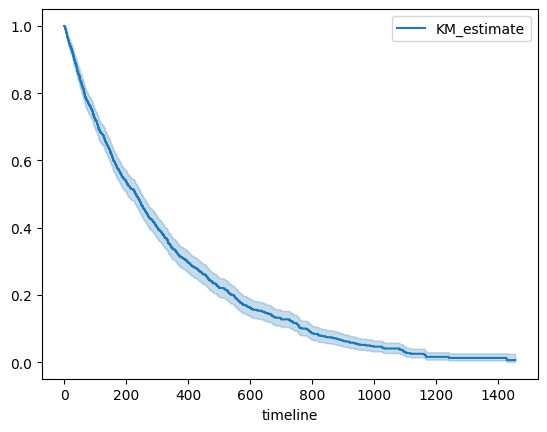

In [8]:
from lifelines import KaplanMeierFitter

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(df['survival_time'], event_observed=df['event'])

# Plot the survival function
kmf.plot_survival_function()

In [13]:
from lifelines import CoxPHFitter


# Create a Cox model
cph = CoxPHFitter()

# Fit the model
cph.fit(df, duration_col='survival_time', event_col='event')

# Print the summary of the model
cph.print_summary()

ValueError: Cannot cast object dtype to float64